In [2]:
from whisperweranalysis.structure import LJSpeech, Predicted_MOS
from whisperweranalysis.groundtruth import lj_valid
from whisperweranalysis.wer import compute

In [3]:
from whisperweranalysis.mel_utilities import audio2mel

In [4]:
# audio2mel()

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
GT_Mel = LJSpeech.load_from_dir('../whisperweranalysis/transcription/VOC/2')

In [48]:
compute(lj_valid, GT_Mel.transcriptions)

2.2451456310679614

## Plotting time

In [68]:
from collections import defaultdict
from pathlib import Path
from whisperweranalysis.checkpoint_mover import get_list_iter

In [69]:
TRANS_DIR = Path('../whisperweranalysis/transcription')

In [70]:
all_systems = defaultdict(lambda: defaultdict(int))
for system in TRANS_DIR.glob('*'):
    for iter_ in sorted(list(system.glob('*')), key=lambda x: int(x.name)):
        lj_struct = LJSpeech.load_from_dir(iter_)
        lj_struct.compute_wer(lj_valid)
        all_systems[system.name][int(iter_.name)] = lj_struct.wer
        # if int(iter_.name) > 50000:
        #     break
        
# all_systems['VOC_500'] = { x: list(all_systems['VOC'].values())[0] for x in all_systems['Tacotron2_500']}

In [71]:
all_systems.keys()

dict_keys(['VOC', 'GRAD', 'MATCHA'])

In [72]:

systems = {
    'MATCHA': all_systems['MATCHA'],
    'GRAD': all_systems['GRAD'],
    'VOC': all_systems['VOC'],
}

y_values, legend_labels = [], []
for model in systems:
    y_values.append([v for k, v in systems[model].items() if k <= 100000])
    legend_labels.append(model)
    
x = sorted([2, 3, 4, 5, 10, 25, 50])


In [73]:
all_systems.keys()

dict_keys(['VOC', 'GRAD', 'MATCHA'])

In [74]:
all_systems

defaultdict(<function __main__.<lambda>()>,
            {'VOC': defaultdict(int,
                         {2: 2.2451456310679614,
                          3: 2.2451456310679614,
                          4: 2.2451456310679614,
                          5: 2.2451456310679614,
                          10: 2.2451456310679614,
                          25: 2.2451456310679614,
                          50: 2.2451456310679614}),
             'GRAD': defaultdict(int,
                         {2: 3.4587378640776696,
                          3: 3.2766990291262137,
                          4: 4.065533980582525,
                          5: 3.4587378640776696,
                          10: 3.8834951456310676,
                          25: 3.5800970873786406,
                          50: 4.12621359223301}),
             'MATCHA': defaultdict(int,
                         {2: 2.669902912621359,
                          3: 2.7305825242718447,
                          4: 2.8519417475728157,
  

In [81]:
len(y_values), len(y_values[0]), y_values

(3,
 7,
 [[2.669902912621359,
   2.7305825242718447,
   2.8519417475728157,
   2.7305825242718447,
   2.7305825242718447,
   2.487864077669903,
   2.366504854368932],
  [3.4587378640776696,
   3.2766990291262137,
   4.065533980582525,
   3.4587378640776696,
   3.8834951456310676,
   3.5800970873786406,
   4.12621359223301],
  [2.2451456310679614,
   2.2451456310679614,
   2.2451456310679614,
   2.2451456310679614,
   2.2451456310679614,
   2.2451456310679614,
   2.2451456310679614]])

In [57]:
x = x[:19]

/home/smehta/Projects/whisper-analysis-plots/whisperweranalysis/plotting/line.py:191: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim)
/home/smehta/Projects/whisper-analysis-plots/whisperweranalysis/plotting/line.py:192: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(ylim)


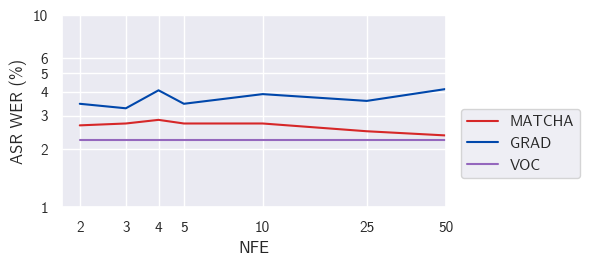

In [58]:
from whisperweranalysis.plotting.line import plot_lines
import matplotlib.pyplot as plt

x_ticks = [2, 3, 4, 5, 10, 25, 50] 
x_tick_labels = ['2', '3', '4', '5', '10', '25', '50']
y_ticks = [1, 2, 3, 4, 5, 6, 10] #, 25, 50, 100]
y_tick_labels = ['1', '2', '3', '4', '5', '6', '10'] #, '25', '50', '100']
plot_colors = ['#d62728', '#0047AB','#9467bd', '#2ca02c', '#8b0000', '#8c564b', '#17becf'] #, '#d62728', '#0047AB', '#2ca02c', ]
line_format = ['-', '-', '-', '-', ':', '-', '-'] # '--', '--', '--']
aspect_ratio = (2, 1)
output_filename = 'asr_nfe.pdf'
plot_log_x = True
plot_log_y = True
xlim = (0, 50)
# with plt.xkcd():
plot_lines([x], y_values, 
            x_label='NFE',
            y_label='ASR WER (%)', 
            legend_label=legend_labels,
            line_format=line_format,
            plot_colors=plot_colors,
            aspect_ratio=aspect_ratio,
            x_ticks=x_ticks,
            x_tick_labels=x_tick_labels,
            y_ticks=y_ticks,
            y_tick_labels=y_tick_labels,
            file_name=output_filename,
            plot_log_x=plot_log_x,
            plot_log_y=plot_log_y,
            xlim=xlim,

    )

## Predicted MOS plot

In [84]:
WAVEFORM_PATH = Path('../whisperweranalysis/waveforms_ICASSP24')

In [85]:
all_systems = defaultdict(lambda: defaultdict(int))
for system in WAVEFORM_PATH.glob('*'):
    for iter_ in sorted(list(system.glob('*')), key=lambda x: int(x.name)):
        predicted_mos = Predicted_MOS.load_from_dir(iter_)
        all_systems[system.name][int(iter_.name)] = predicted_mos 

In [86]:
all_systems['VOC'].values()

dict_values([Predicted_MOS(model_name=VOC, iterations=2, mean=4.540, std=0.137, min=4.161, max=4.759, median=4.555, mode=4.477, count=99), Predicted_MOS(model_name=VOC, iterations=3, mean=4.540, std=0.137, min=4.161, max=4.759, median=4.555, mode=4.477, count=99), Predicted_MOS(model_name=VOC, iterations=4, mean=4.540, std=0.137, min=4.161, max=4.759, median=4.555, mode=4.477, count=99), Predicted_MOS(model_name=VOC, iterations=5, mean=4.540, std=0.137, min=4.161, max=4.759, median=4.555, mode=4.477, count=99), Predicted_MOS(model_name=VOC, iterations=10, mean=4.540, std=0.137, min=4.161, max=4.759, median=4.555, mode=4.477, count=99), Predicted_MOS(model_name=VOC, iterations=25, mean=4.540, std=0.137, min=4.161, max=4.759, median=4.555, mode=4.477, count=99), Predicted_MOS(model_name=VOC, iterations=50, mean=4.540, std=0.137, min=4.161, max=4.759, median=4.555, mode=4.477, count=99), Predicted_MOS(model_name=VOC, iterations=100, mean=4.540, std=0.137, min=4.161, max=4.759, median=4.55

In [87]:

systems = {
    'MATCHA': all_systems['MATCHA'],
    'GRAD': all_systems['GRAD'],
    'VOC': all_systems['VOC'],
}

y_values, legend_labels = [], []
for model in systems:
    per_nfe = []
    for k, v in systems[model].items():
        per_nfe.append(list(v.predicted_mos.values()))
    y_values.append(per_nfe)
    legend_labels.append(model)
    
x = sorted([2, 3, 4, 5, 10, 25, 50, 100])


(8, 99)
(8, 99)
(8, 99)


/home/smehta/Projects/whisper-analysis-plots/whisperweranalysis/plotting/line.py:318: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlabel(x_label)
/home/smehta/Projects/whisper-analysis-plots/whisperweranalysis/plotting/line.py:319: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylabel(y_label)


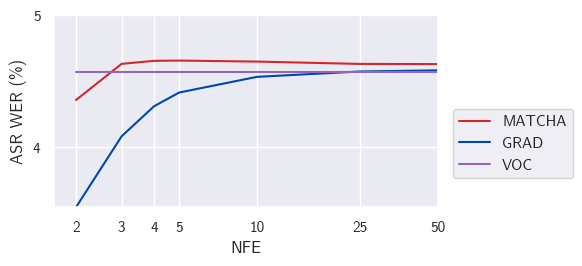

In [95]:
from whisperweranalysis.plotting.line import plot_lines_with_confidence_intervals
import matplotlib.pyplot as plt

x_ticks = [2, 3, 4, 5, 10, 25, 50, 100] 
x_tick_labels = ['2', '3', '4', '5', '10', '25', '50', '100']
y_ticks = [0, 1, 2, 3, 4, 5] #, 25, 50, 100]
y_tick_labels = ['0', '1', '2', '3', '4', '5'] #, '25', '50', '100']
plot_colors = ['#d62728', '#0047AB','#9467bd', '#2ca02c', '#8b0000', '#8c564b', '#17becf'] #, '#d62728', '#0047AB', '#2ca02c', ]
line_format = ['-', '-', '-', '-', ':', '-', '-'] # '--', '--', '--']
aspect_ratio = (2, 1)
output_filename = 'mos_nfe.pdf'
plot_log_x = True
plot_log_y = True
xlim = (0, 50)
# with plt.xkcd():
plot_lines_with_confidence_intervals([x], y_values, 
            x_label='NFE',
            y_label='Predicted MOS', 
            legend_label=legend_labels,
            line_format=line_format,
            plot_colors=plot_colors,
            aspect_ratio=aspect_ratio,
            x_ticks=x_ticks,
            x_tick_labels=x_tick_labels,
            y_ticks=y_ticks,
            y_tick_labels=y_tick_labels,
            file_name=output_filename,
            plot_log_x=plot_log_x,
            plot_log_y=plot_log_y,
            xlim=xlim,
            plot_confidence=False,
    )